<a href="https://colab.research.google.com/github/sandipanpaul21/Dimensionality-Reduction-in-Python/blob/master/15_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Factor Analysis**

- Factor analysis can only be used to reduce continuous variables of the dataset. Therefore, we will be removing categorical variables. 
- Factor analysis is a linear statistical model. 
- It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors.
- Observed variables are modeled as a linear combination of factors and error terms 
- Factor or latent variable is associated with multiple observed variables, who have common patterns of responses.
- Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.
- Factor analysis is a method for investigating whether a number of variables of interest X1, X2,……., Xi, are linearly related to a smaller number of unobservable factors F1, F2,..……, Fk.

#### **Assumptions:**
1. There are no outliers in data.
2. Sample size should be greater than the factor.
3. There should not be perfect multicollinearity.
4. There should not be homoscedasticity between the variables.

#### **Types of Factor Analysis**
1. **Exploratory Factor Analysis :** Its basic assumption is that any observed variable is directly associated with any factor.
2. **Confirmatory Factor Analysis (CFA):** Its basic assumption is that each factor is associated with a particular set of observed variables. CFA confirms what is expected on the basic.

**How does factor analysis work?**
- The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. 
- These unobserved variables help the market researcher to conclude the survey. - This conversion of the observed variables to unobserved variables can be achieved in two steps:
  1. **Factor Extraction:** In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.
  2. **Factor Rotation:** In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

**What is a factor?**
- A factor is a latent variable which describes the association among the number of observed variables. 
- The maximum number of factors are equal to a number of observed variables. Every factor explains a certain variance in observed variables. 
- The factors with the lowest amount of variance were dropped. 
- Factors are also known as latent variables or hidden variables or unobserved variables or Hypothetical variables.

**What are the factor loadings?**
- The factor loading is a matrix which shows the relationship of each variable to the underlying factor. 
- It shows the correlation coefficient for observed variable and factor. 
- It shows the variance explained by the observed variables.

**What is Eigenvalues?**

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.

**What are Communalities?** 

- Commonalities are the sum of the squared loadings for each variable. It represents the common variance. 
- It ranges from 0-1 and value close to 1 represents more variance.

**What is Factor Rotation?**

- Rotation is a tool for better interpretation of factor analysis. Rotation can be orthogonal or oblique. 
- It re-distributed the commonalities with a clear pattern of loadings.

**Choosing the Number of Factors**
- Kaiser criterion is an analytical approach, which is based on the more significant proportion of variance explained by factor will be selected. 
- The eigenvalue is a good criterion for determining the number of factors. Generally, an eigenvalue greater than 1 will be considered as selection criteria for the feature.
- The graphical approach is based on the visual representation of factors' eigenvalues also called scree plot. This scree plot helps us to determine the number of factors where the curve makes an elbow.

**Factor Analysis Vs. Principle Component Analysis**
- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.
- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.
- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.
- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique

**BARTLETT’S TEST OF SPHERICITY**
- Bartlett’s test checks whether the correlation is present in the given data. - It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. 
- The identical matrix consists of all the diagonal elements as 1.
-  So, the null hypothesis assumes that no correlation is present among the variables.
- We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. 
- If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

**Pros and Cons of Factor Analysis**
- Factor analysis explores large dataset and finds interlinked associations. 
- It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. 
- Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.
- Results of factor analysis are controversial. 
- Its interpretations can be debatable because more than one interpretation can be made of the same data factors. 
- After factor identification and naming of factors requires domain knowledge.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [2]:
# Load the Datasets 

# Boston Dataset
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(boston_pd)
print("P value of Barlett Test :",p_value)
print("In this Bartlett ’s test, the p-value is 0. The test was statistically significant")
print("So indicating that the observed correlation matrix is not an identity matrix.")

P value of Barlett Test : 0.0
In this Bartlett ’s test, the p-value is 0. The test was statistically significant
So indicating that the observed correlation matrix is not an identity matrix.


**Kaiser-Meyer-Olkin (KMO)**
- Test measures the suitability of data for factor analysis. 
- It determines the adequacy for each observed variable and for the complete model. 
- KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. 
- KMO values range between 0 and 1. 
- Value of KMO less than 0.6 is considered inadequate.

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(boston_pd)
print("KMO Test :",kmo_model)
print("The overall KMO for our data is more than 0.84, which is excellent.")
print("This value indicates that you can proceed with your planned factor analysis.")

KMO Test : 0.8527194101902166
The overall KMO for our data is more than 0.84, which is excellent.
This value indicates that you can proceed with your planned factor analysis.


In [5]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(boston_pd)
fa

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='promax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [6]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print(ev)
print("Here, you can see only for 3-factors eigenvalues are greater than one.")
print("It means we need to choose only 3 factors (or unobserved variables).")

[6.54598958 1.64953191 1.34890592 0.88653987 0.85089944 0.66001077
 0.5354108  0.40307658 0.27726358 0.25225744 0.21279025 0.1829875
 0.1340097  0.06032666]
Here, you can see only for 3-factors eigenvalues are greater than one.
It means we need to choose only 3 factors (or unobserved variables).


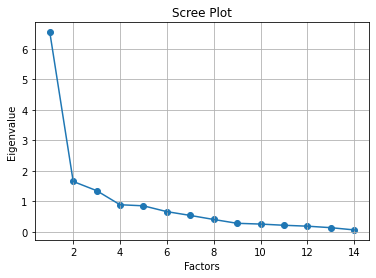

The scree plot method draws a straight line for each factor and its eigenvalues.
Number eigenvalues greater than one considered as the number of factors.
Here, you can see only for 3-factors eigenvalues are greater than one.
It means we need to choose only 3 factors (or unobserved variables).


In [7]:
# Create scree plot using matplotlib
plt.scatter(range(1,boston_pd.shape[1]+1),ev)
plt.plot(range(1,boston_pd.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()
print("The scree plot method draws a straight line for each factor and its eigenvalues.")
print("Number eigenvalues greater than one considered as the number of factors.")
print("Here, you can see only for 3-factors eigenvalues are greater than one.")
print("It means we need to choose only 3 factors (or unobserved variables).")

In [8]:
# Performing Factor Analysis

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3)
fa.fit(boston_pd)
fa.loadings_

array([[ 0.00681393,  0.62752005, -0.03747586],
       [-0.6864742 ,  0.15409256,  0.21429705],
       [ 0.57923372,  0.29165741, -0.12918081],
       [ 0.22773115, -0.05249549,  0.22701669],
       [ 0.69503037,  0.28719269,  0.01927342],
       [-0.14855496,  0.2187204 ,  0.81465728],
       [ 0.78266901,  0.04952037, -0.05658295],
       [-0.91421884, -0.09769615, -0.1311503 ],
       [-0.02472132,  1.06885318,  0.18159069],
       [ 0.06796636,  0.94426231,  0.06523967],
       [ 0.01384139,  0.25091612, -0.37124322],
       [-0.05072981, -0.45037014,  0.02968354],
       [ 0.36173886,  0.0743171 , -0.59322145],
       [-0.06415291,  0.01811887,  0.94045888]])

In [9]:
# Making it into readable structure
loadings = fa.loadings_
Variable_Names =['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','MedV'] 
Matrix = pd.DataFrame(loadings,index = Variable_Names,
                      columns = ['Factor_1','Factor_2','Factor_3'])
Matrix

# Inference
# Loadings indicate how much a factor explains a variable. 
# The loading score will range from -1 to 1.
# Values close to -1 or 1 indicate that the factor has an influence on these variables. 
# Values close to 0 indicates that the factor has a lower influencer on the variable.

# For example, 
# in Factor 1, we can see that the features ‘age’ and ‘nox’  have high loadings than other variables. 
# From this, we can see that Factor 0, explains the common variance 

,Factor_1,Factor_2,Factor_3
crim,0.006814,0.627520,-0.037476
zn,-0.686474,0.154093,0.214297
indus,0.579234,0.291657,-0.129181
chas,0.227731,-0.052495,0.227017
nox,0.695030,0.287193,0.019273
rm,-0.148555,0.218720,0.814657
age,0.782669,0.049520,-0.056583
dis,-0.914219,-0.097696,-0.131150
rad,-0.024721,1.068853,0.181591
tax,0.067966,0.944262,0.065240


In [10]:
# Also compute the proportional variance and cumulative variance of the 3-factor solution

print("Total 58% cumulative Variance explained by the 3 factors.")
pd.DataFrame(fa.get_factor_variance(),
             index = ['SS Loading','Population Variance','Cummulative Variance'],
             columns = ['Factor_1','Factor_2','Factor_3'])

# Inference : 
# The first row represents the variance explained by each factor. 
# Population variance is the variance explained by a factor out of the total variance. 
# Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. 
# In our case, the 3 factors together are able to explain 58% of the total variance.

# In unrotated cases, the variances would be equal to the eigenvalues. 
# Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. 
# Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.

Total 58% cumulative Variance explained by the 3 factors.


,Factor_1,Factor_2,Factor_3
SS Loading,2.955135,2.953383,2.212301
Population Variance,0.211081,0.210956,0.158021
Cummulative Variance,0.211081,0.422037,0.580058


In [11]:
# COMMUNALITIES
# Communality is the proportion of each variable’s variance that can be explained by the factors. 
# Rotations don’t have any influence over the communality of the variables.

print(pd.DataFrame(fa.get_communalities(),index=boston_pd.columns,columns=['Communalities']))

# Inference :
# The proportion of each variable’s variance that is explained by the factors can be inferred. 
# For example, we could consider the variable ‘CRIM’ about 39% of its variance is explained by all the factors together.

         Communalities
CRIM          0.395232
ZN            0.540915
INDUS         0.437263
CHAS          0.106154
NOX           0.565918
RM            0.733574
AGE           0.618225
DIS           0.862541
RAD           1.176033
TAX           0.900507
PTRATIO       0.200972
B             0.206288
LSTAT         0.488290
MEDV          0.888907


That’s all about the factor analysis which can be used to find the underlying variance due to correlation among the observed variables like my heart which finds the creamy layer of the Oreo despite the unappetizing outer crunchy biscuits.

In [12]:
# Also compute the proportional variance and cumulative variance of the 4-factor solution
# Performing Factor Analysis

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=4)
fa.fit(boston_pd)
fa.loadings_

print("Total 62% cumulative Variance explained by the 4 factors.")
pd.DataFrame(fa.get_factor_variance(),
             index = ['SS Loading','Population Variance','Cummulative Variance'],
             columns = ['Factor_1','Factor_2','Factor_3','Factor_4'])

Total 62% cumulative Variance explained by the 4 factors.


,Factor_1,Factor_2,Factor_3,Factor_4
SS Loading,2.937030,2.823889,2.163093,0.790065
Population Variance,0.209788,0.201706,0.154507,0.056433
Cummulative Variance,0.209788,0.411494,0.566001,0.622434


In [13]:
# Also compute the proportional variance and cumulative variance of the 2-factor solution

# Performing Factor Analysis

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=2)
fa.fit(boston_pd)
fa.loadings_

print("Total 50% cumulative Variance explained by the 2 factors.")
pd.DataFrame(fa.get_factor_variance(),
             index = ['SS Loading','Population Variance','Cummulative Variance'],
             columns = ['Factor_1','Factor_2'])

Total 50% cumulative Variance explained by the 2 factors.


,Factor_1,Factor_2
SS Loading,5.223245,1.915309
Population Variance,0.373089,0.136808
Cummulative Variance,0.373089,0.509897


In [14]:
# Another Method
# Removing Response Variable

Factor1 = boston_pd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                    'TAX','PTRATIO', 'B', 'LSTAT']]
Factor1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
# Creating Correlation Matrix for the above dataset

# To perform factor analysis we first create a correlation matrix using the above dataset.
# We can also manually analyse this matrix as this will give us an idea of the variables 
# that are highly correlated to each other.
corrm = Factor1.corr()
corrm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [16]:
# Finding Eigen Values

# We will now find the eigenvalues to decide the number of factors 
# that will correctly group the features on the level of their similarity 
# allowing us to manually select features from each of these groups.
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values/12).cumsum()
eigen_values_cumvar

# Inference : 
# Clearly, the four factors explain approximately 80% of the variance. 
# Therefore, the number of factors will be equal to 4 in our case.

array([0.51057074, 0.63001033, 0.73356172, 0.80502631, 0.87459431,
       0.92937824, 0.97399124, 1.00699935, 1.01229179, 1.0353704 ,
       1.04947898, 1.06498018, 1.08333333])

In [17]:
# Using Factor Analyzer to perform factor analysis

# Compute the factor loadings to group the variables based on their correlation values
Factor_Analysis = FactorAnalyzer(n_factors=4,rotation='varimax',method='ml')
Factor_Analysis.fit(Factor1)

# Here, we have used rotation equal to varimax to get maximum variance 
# and the method deployed for factor analysis is maximum likelihood.
# R and Python use methods – maximum likelihood or minres. 

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=4, rotation='varimax', rotation_kwargs={},
               svd_method='randomized', use_smc=True)

In [18]:
# Compute Factor Loading

loadings = Factor_Analysis.loadings_
Variable_Names =['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'] 
Matrix = pd.DataFrame(loadings,index = Variable_Names,
                      columns = ['Factor_1','Factor_2','Factor_3','Factor_4'])
Matrix

# Select variables for each of these groups which will help us decreasing the features 
# and decrease the chances of multicollinearity.

,Factor_1,Factor_2,Factor_3,Factor_4
crim,0.585458,0.146890,0.149510,0.121240
zn,-0.069552,-0.750364,-0.143407,-0.352882
indus,0.552113,0.573599,0.302909,0.067669
chas,-0.016890,0.150731,-0.114095,-0.151607
nox,0.567399,0.659297,0.235815,-0.166511
rm,-0.120800,-0.123509,-0.758943,-0.231940
age,0.351947,0.715909,0.223779,-0.031676
dis,-0.366249,-0.833285,-0.077686,0.003268
rad,0.897665,0.196578,0.031521,0.243988
tax,0.908120,0.231359,0.139312,0.185353


In [19]:
# Also compute the proportional variance and cumulative variance of the 4-factor solution

pd.DataFrame(Factor_Analysis.get_factor_variance(),
             index = ['SS Loading','Population Variance','Cummulative Variance'],
             columns = ['Factor_1','Factor_2','Factor_3','Factor_4'])

,Factor_1,Factor_2,Factor_3,Factor_4
SS Loading,3.326160,2.856880,1.339279,0.807530
Population Variance,0.255858,0.219760,0.103021,0.062118
Cummulative Variance,0.255858,0.475618,0.578640,0.640758
